## Example 4 - Time and Task Segmentation  <a class="anchor" id="TOC9"></a>

In this example we will look at the function to segment a dataset into different activities if e.g. a pouring process occurst several times during the dataset, you can define a start and stop time for each event and pool the datapoints together, giving you an average concentration and/or size distribution for those times.

No zeros, continuing


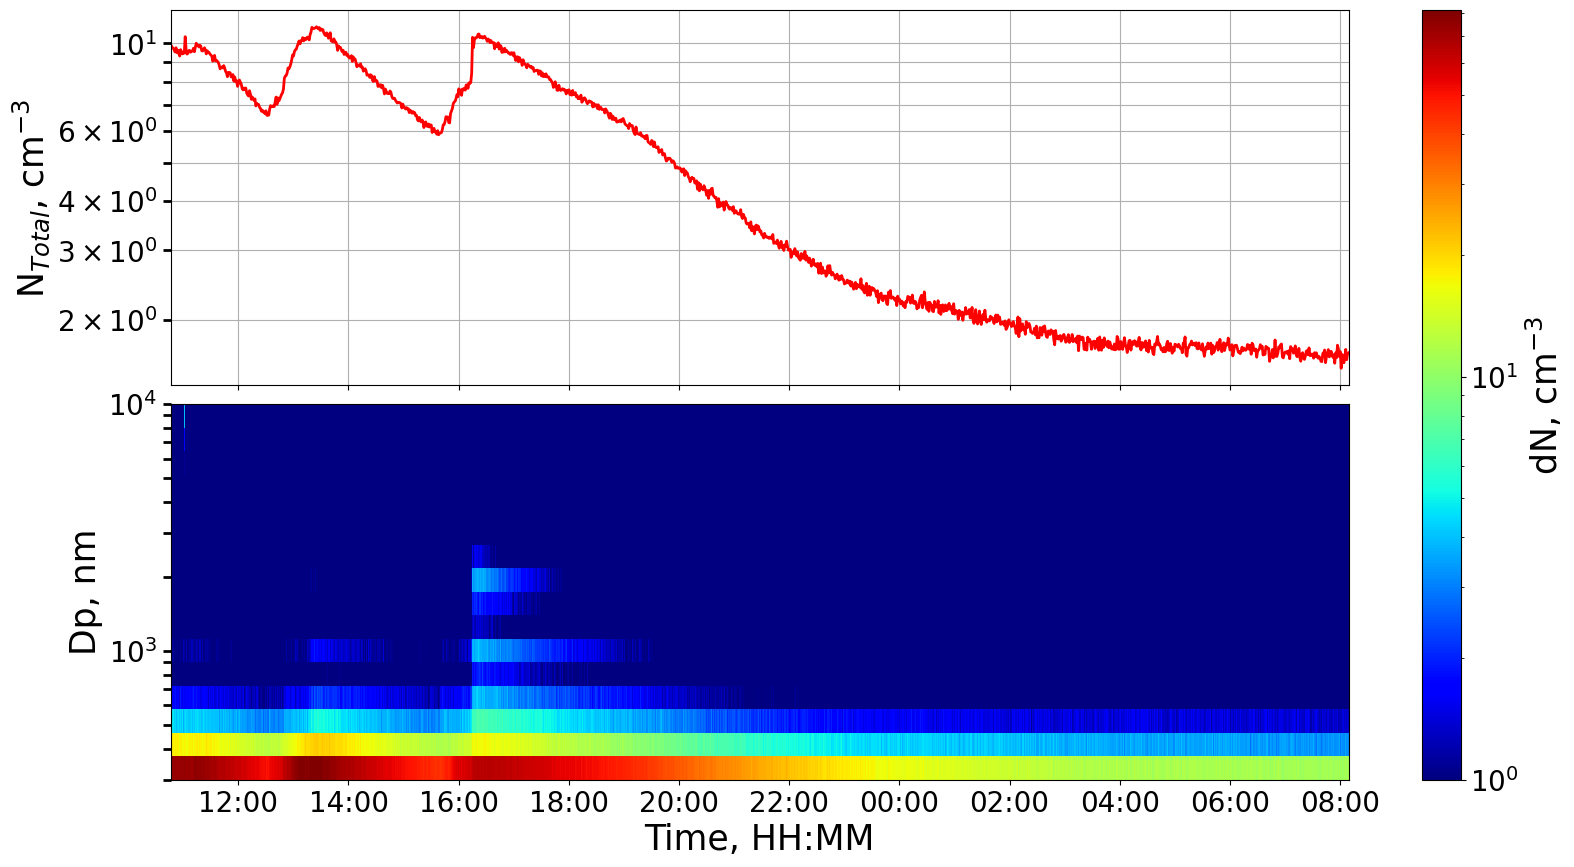

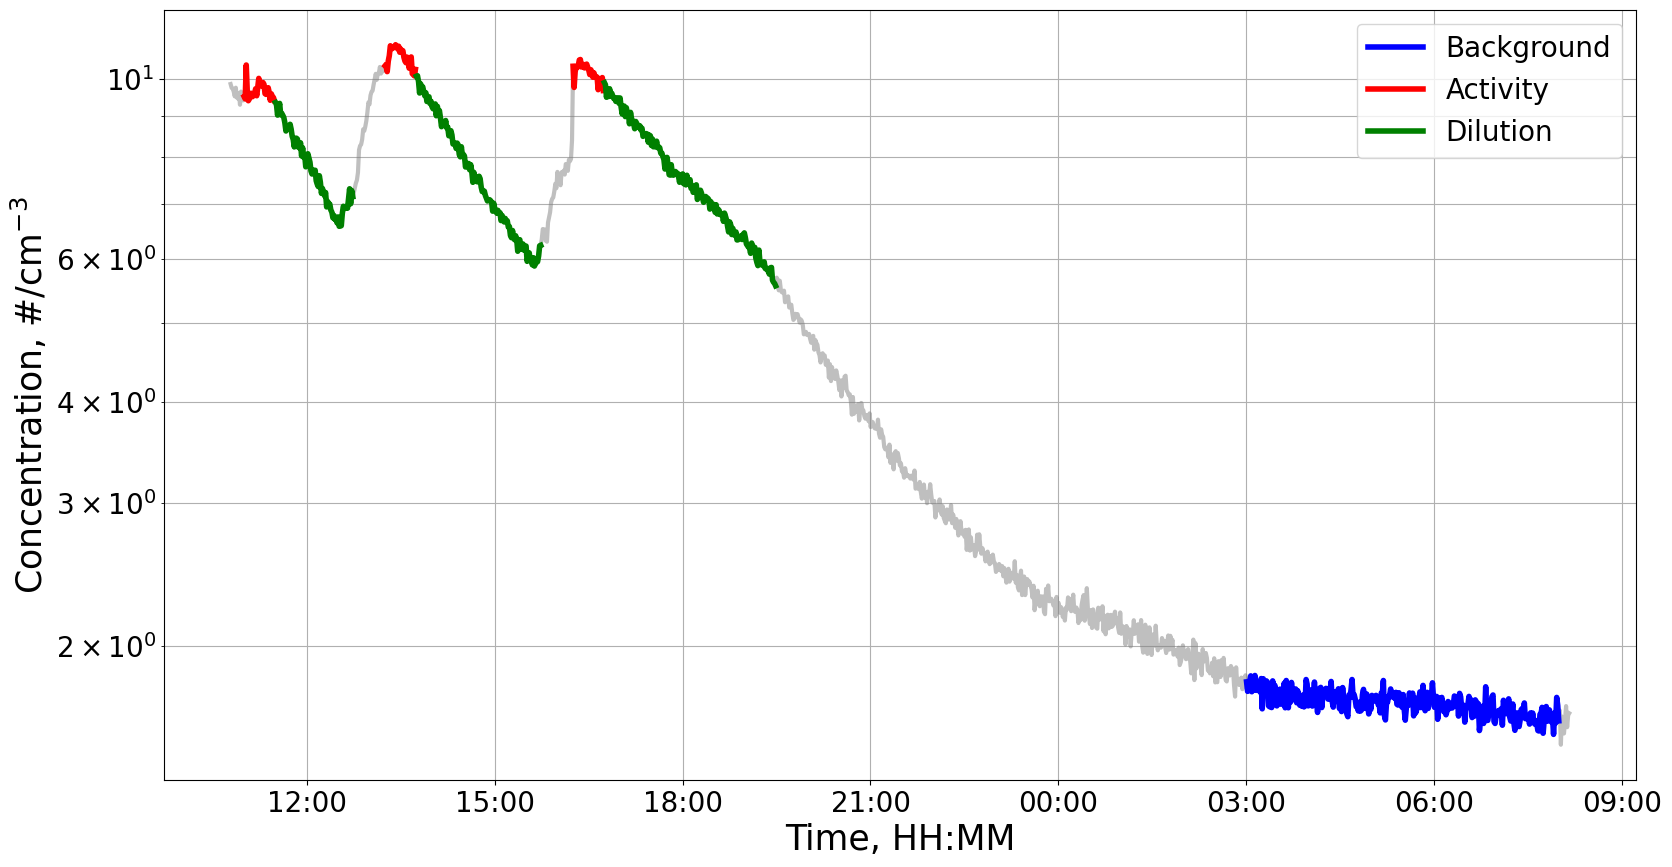

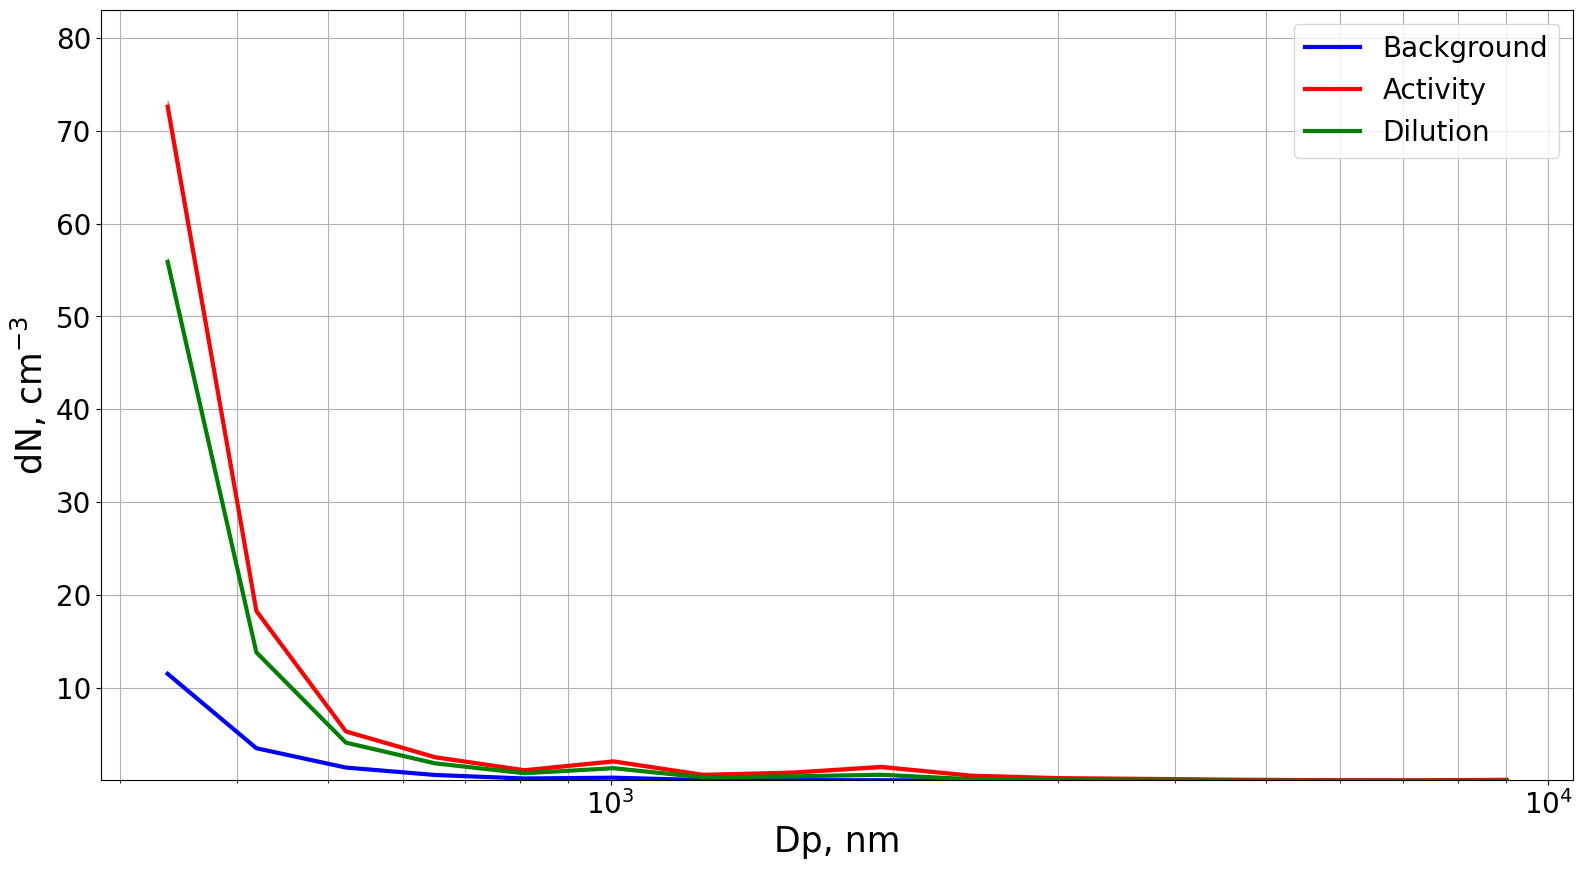

In [11]:
import NFA_Aerosol.Instrument_Lib as IL
import NFA_Aerosol.Plot_Lib as PL
import NFA_Aerosol.Utility_Lib as UL
import datetime as datetime

data,bin_edges,header = IL.Load_OPS(r"Example Data\OPS_1.txt")
bin_mids = header[2:]

fig,axs = PL.Plot_timeseries(data,bin_edges,y_3d=(1,0))

Times_background = [datetime.datetime(2019,8,20,3,0),datetime.datetime(2019,8,20,8,0)]

Times_activity = [datetime.datetime(2019,8,19,11,0),datetime.datetime(2019,8,19,11,30),
                  datetime.datetime(2019,8,19,13,15),datetime.datetime(2019,8,19,13,45),
                  datetime.datetime(2019,8,19,16,15),datetime.datetime(2019,8,19,16,45)]

Times_diluted = [datetime.datetime(2019,8,19,11,30),datetime.datetime(2019,8,19,12,45),
                  datetime.datetime(2019,8,19,13,45),datetime.datetime(2019,8,19,15,45),
                  datetime.datetime(2019,8,19,16,45),datetime.datetime(2019,8,19,19,30)]

All_segments = [Times_background,Times_activity,Times_diluted]

Activity_labels = ["Background", "Activity","Dilution"]

index = UL.segment_dataset(data,All_segments)

fig,axs = PL.Plot_time_segments(data,index,Activity_labels)

Background_data = data[index==1]
Activity_data = data[index==2]
Diluted_data = data[index==3]

fig,ax = PL.Plot_PSD(bin_mids,Background_data,Activity_data,Diluted_data,label=Activity_labels,y_lim=(0.1,0),ylog=0)

#### Example 4 in detail

We will now go through each line of code and determine what they do.

Initially we import the NFA_Aerosol Python library and the datetime package, as we will also work with times and dates here. We then load the OPS dataset via the IL.Load_OPS function and visualize it via the PL.Plot_timeseries() function.

In [ ]:
import NFA_Aerosol.Instrument_Lib as IL
import NFA_Aerosol.Plot_Lib as PL
import NFA_Aerosol.Utility_Lib as UL
import datetime as datetime

data,bin_edges,header = IL.Load_OPS(r"L:\PG-Nanoteknologi\PERSONER\ABL\2019-02-13 - OPS.txt")
bin_mids = header[2:]

fig,axs = PL.Plot_timeseries(data,bin_edges,y_3d=(1,0))

We now want to divide or segment the dataset into different activities, as we have a reoccurring process and we want to determine the size distribution (or PM level) from this specific process. We therefore specify some start an stop times in different lists. Here we have 3 processes, which we call background, activity, and dilution. Background only has one start and one stop time, which corresponds to the 20th of August 2019 from 03:00:00 to 08:00:00 written as datetime objects: datetime.datetime(2019,8,20,3,0) and datetime.datetime(2019,8,20,8,0). The two times are stored in a list, that is comma seperated with square brackets marking the start and stop of the list. 

The activity process has three start and stop times. The function is written so that every other datetime in the list is a start and every other +1 is an end time. You can collect as many start and stop times in a list as you want, and you can have as many processes as you want, just keep them in seperate lists.

In [ ]:
Times_background = [datetime.datetime(2019,8,20,3,0),datetime.datetime(2019,8,20,8,0)]

Times_activity = [datetime.datetime(2019,8,19,11,0),datetime.datetime(2019,8,19,11,30),
                  datetime.datetime(2019,8,19,13,15),datetime.datetime(2019,8,19,13,45),
                  datetime.datetime(2019,8,19,16,15),datetime.datetime(2019,8,19,16,45)]

Times_diluted = [datetime.datetime(2019,8,19,11,30),datetime.datetime(2019,8,19,12,45),
                  datetime.datetime(2019,8,19,13,45),datetime.datetime(2019,8,19,15,45),
                  datetime.datetime(2019,8,19,16,45),datetime.datetime(2019,8,19,19,30)]

We then store all of the individual lists of start and stop times in an overall list, and we make an additional list with labels that we want to give the three processes:

In [ ]:
All_segments = [Times_background,Times_activity,Times_diluted]

Activity_labels = ["Background", "Activity","Dilution"]

Now we do the actual segmentation by using the UL.segment_dataset() function. This function generates a new dataset with one column full of zeros but with the same length as our original dataset. It then finds all the indexes, corresponding to datapoints within e.g. the specified background start and stop times and turns these zeros into ones. The function then proceeds to datapoints within the specified activity times and sets indexes to 2 and so on untill all the specified processes have been marked.

In [12]:
index = UL.segment_dataset(data,All_segments)
print(index)

[0. 0. 0. ... 0. 0. 0.]


We can then plot the total number concentration time series, where we mark the different processes in different colors to show our time intervals. 

In [ ]:
fig,axs = PL.Plot_time_segments(data,index,Activity_labels)

In addition, we can divide our large dataset into smaller datasets, corresponding to each process by asking for the rows where a specific criterie is fulfilled e.g. data[index==1] (background data) or data[index==2] (activity data).

In [ ]:
Background_data = data[index==1]
Activity_data = data[index==2]
Diluted_data = data[index==3]

This allows us to plot the average particle size distributions measured during each process:

In [ ]:
fig,ax = PL.Plot_PSD(bin_mids,Background_data,Activity_data,Diluted_data,label=Activity_labels,y_lim=(0.1,0),ylog=0)

You could also determine the PM levels during each process by converting each of the smaller datasets into mass concentrations via UL.num2mass and then use UL.PM_calc(). 